# Evaluation

this notebook contains all graphs included in the evaluation part of the thesis.

In [1]:
import sys
sys.path.insert(0, '/home/ynezri/CardEst/')

In [2]:
from preprocessing import TraceStats, BatchStats
from estimators import AE, GEE, UJ2A, SGD, PA, RLS
from visualization import plot_card, plot_sampling, plot_ml, plot_features, plot_tradeoff
from itertools import product
from scipy.stats import linregress
import pandas as pd
from functools import partial

import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# trace parameters used to create runs

runs = {}
traces = ['caida-2016', 'ucla-csd', 'caida-ddos', 'darpa-ddos']

runs['caida-2016'] = {'sampling_rates': [0.001, 0.005, 0.01, 0.02, 0.1],
                      'partitions': ['50K', '100K', '150K'],
                      'training_rates': [0.02, 0.05, 0.1, 0.2]}

runs['ucla-csd'] = {'sampling_rates': [0.001, 0.005, 0.01, 0.02, 0.1],
                      'partitions': ['50K', '100K', '150K'],
                      'training_rates': [0.02, 0.05, 0.1, 0.2]}

runs['caida-ddos'] = {'sampling_rates': [0.001, 0.005, 0.01, 0.02],
                      'partitions': ['1S', '2S', '3S'],
                      'training_rates': [0.02, 0.05, 0.1, 0.2]}

runs['darpa-ddos'] = {'sampling_rates': [0.001, 0.005, 0.01, 0.02, 0.1],
                      'partitions': ['1S', '2S', '3S'],
                      'training_rates': [0.02, 0.05, 0.1, 0.2]}

## CAIDA-2016

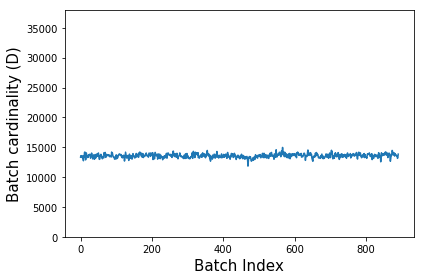

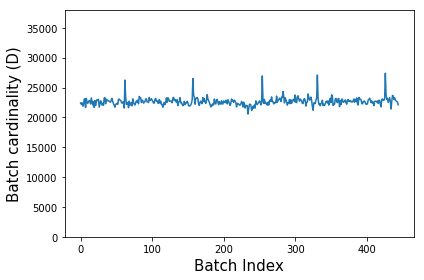

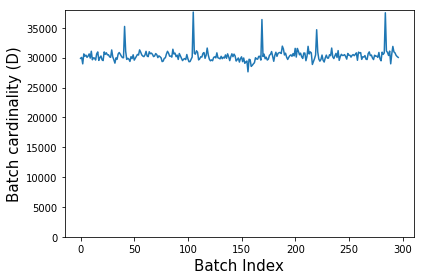

In [4]:
# create cardinality vs batch index graph (Ignore last batch)

trace = 'caida-2016'
# choose random sampling rate(has no effect over this graph)
sampling_rate = runs[trace]['sampling_rates'][0]
partitions = runs[trace]['partitions']
ylim = (0, 38000)

plot_card(trace, sampling_rate, partitions, ylim)

<BarContainer object of 875 artists>

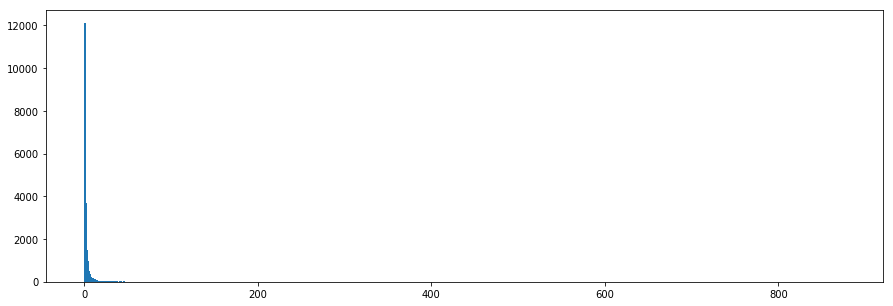

In [5]:
bs = BatchStats.from_pcap('/home/ynezri/data/caida_backbone/merged_tcp_100000_pkts/file_00000_20160317145911.pcap', sampling_rate=1)

m = max(bs.histogram)
fig ,axes = plt.subplots(1,1, figsize=(15,5))

axes.bar(range(1,m+1), [bs.histogram[i] for i in range(1, m+1)], 3)

In [6]:
total_flows = sum(bs.histogram[i] for i in range(1,m+1))

# total_packets = sum(i*bs.histogram[i] for i in range(1,m+1))
total_packets = 100000

n = 3
percent_of_flows_under = sum([bs.histogram[i] for i in range(1, 4)])/total_flows * 100
percent_of_packets_over = sum([i*bs.histogram[i] for i in range(20, m)])/total_packets * 100

print(percent_of_flows_under, percent_of_packets_over)

81.12862369828314 51.615


,RMSE,MAPE,Cumulative
GEE,12592.662023,55.551566,5.599351e+06
AE,18788.958196,82.923900,8.357175e+06
UJ2A,13449.641100,58.902207,5.939427e+06


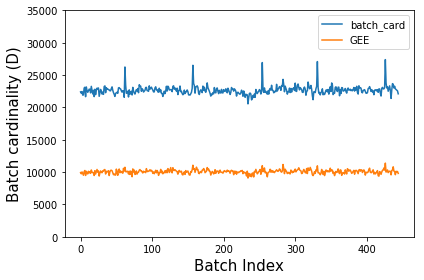

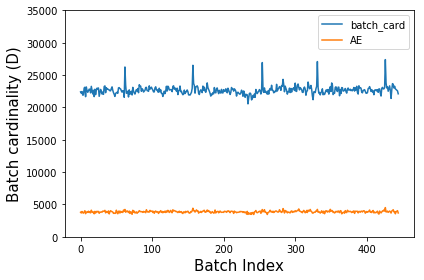

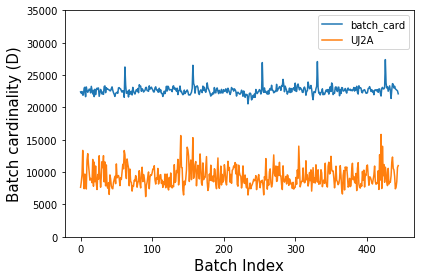

In [7]:
# show the performance of traditional algorithms. 150K, same graph

trace = 'caida-2016'
# sampling_rates = runs[trace]['sampling_rates']
sampling_rate = 0.0198
partition = '100K'
features = ['f_1']
models = [GEE, AE, UJ2A]
model_names = ['GEE', 'AE', 'UJ2A']
ylim = (0, 35000)

plot_sampling(trace, sampling_rate, partition, models, model_names, ylim)

,RMSE,MAPE,Cumulative
SGD,703.663423,2.416887,245072.672043
PA,751.271656,2.568828,260331.092521
RLS,703.996842,2.409428,244401.635849


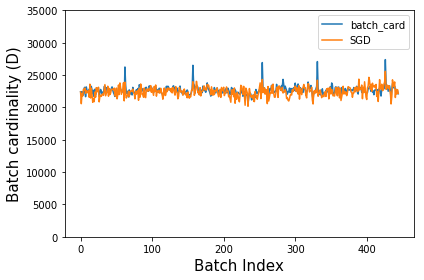

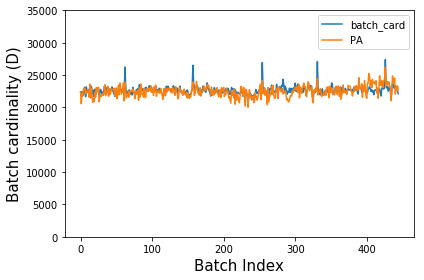

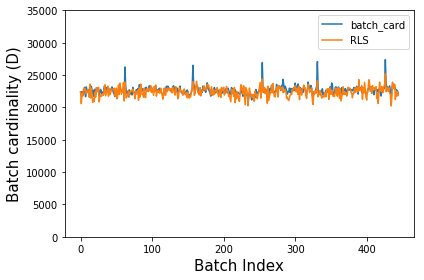

In [8]:
# compare online ML algs.

trace = 'caida-2016'
sampling_rate = 0.01
training_rate = 0.01
partition = '100K'

features = ['f_1']
models = [SGD, PA, RLS]
model_names = ['SGD', 'PA', 'RLS']
ylim = (0, 35000)

plot_ml(trace, sampling_rate, training_rate, partition, features, models, model_names, ylim)

,"('f_1',)","('f_1', 'f_2', 'f_3')","('f_1', 'f_2', 'f_3', 'avg_pkt_len')","('f_1', 'f_2', 'f_3', 'syn_count')"
SGD,2.416887,2.363993,3.702920,2.362605
PA,2.568828,2.500717,3.457315,2.500645
RLS,2.409428,2.363109,2.536693,2.361401


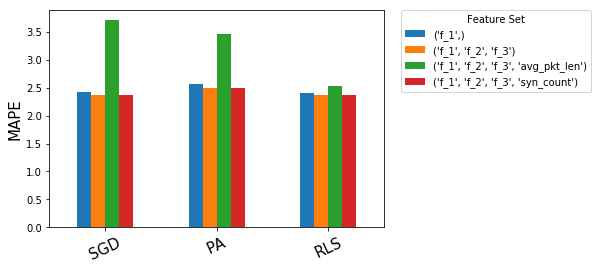

In [9]:
# different feature sets


trace = 'caida-2016'
sampling_rate = 0.01
training_rate = 0.01
partition = '100K'

feature_sets = [('f_1',), ('f_1', 'f_2', 'f_3'), ('f_1', 'f_2', 'f_3', 'avg_pkt_len'),
                ('f_1', 'f_2', 'f_3', 'syn_count')]

models = [SGD, PA, RLS]
model_names = ['SGD', 'PA', 'RLS']

plot_features(trace, sampling_rate, training_rate, partition, feature_sets, models, model_names)

,0.005,0.01,0.015
50K,5.165994,3.769700,2.653357
100K,3.618007,2.772884,2.244434
150K,3.242135,3.238835,1.805624


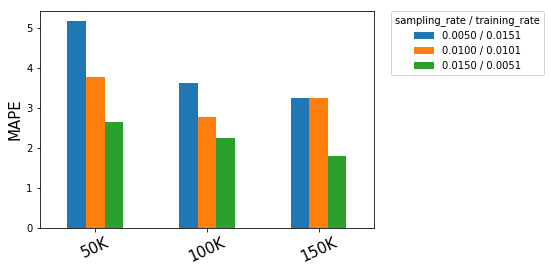

In [10]:
# training rate - sampling rate tradeoff


trace = 'caida-2016'
effective_sampling_rate = 0.02
sampling_rates = [0.005, 0.01, 0.015]
partitions = ['50K', '100K', '150K']
features = ['f_1']
model = PA
model_name='PA'

plot_tradeoff(trace, effective_sampling_rate, sampling_rates, partitions, features, model, model_name)

# CAIDA-DDOS

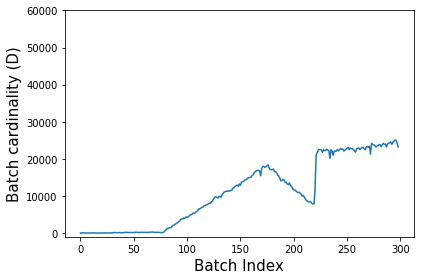

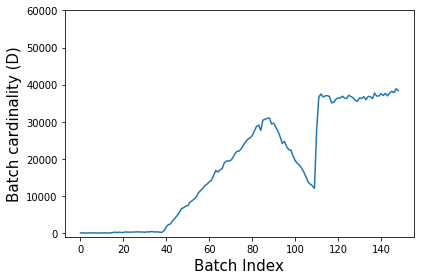

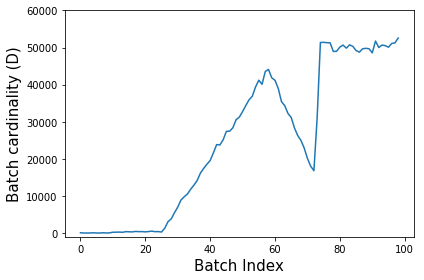

In [11]:
# create cardinality vs batch index graph (Ignore last batch)

trace = 'caida-ddos'
sampling_rate = runs[trace]['sampling_rates'][0]
partitions = runs[trace]['partitions']
ylim = (-1000, 60000)

plot_card(trace, sampling_rate, partitions, ylim)

### no attack batch

In [12]:
# plot 1st 100K batch frequency of frequencies

bs = BatchStats.from_pcap('/home/ynezri/data/caida_ddos/1_sec/ddos_1_sec_00020_20070805001456.pcap', sampling_rate=1)

In [13]:
bs.batch_size

400

### attack batch

In [14]:
# plot 1st 100K batch frequency of frequencies

bs = BatchStats.from_pcap('/home/ynezri/data/caida_ddos/1_sec/ddos_1_sec_00299_20070805001935.pcap', sampling_rate=1)

In [15]:
bs.batch_size

172337

<BarContainer object of 129 artists>

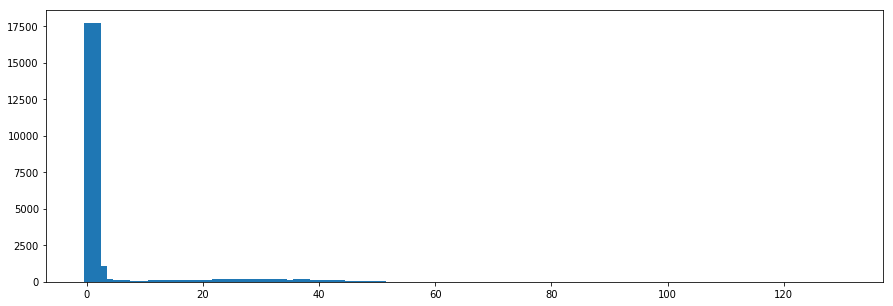

In [16]:
m = max(bs.histogram)
fig ,axes = plt.subplots(1,1, figsize=(15,5))

axes.bar(range(1,m+1), [bs.histogram[i] for i in range(1, m+1)], 3)

In [17]:
# heavy tailed parameters

total_flows = sum(bs.histogram[i] for i in range(1,m+1))

# total_packets = sum(i*bs.histogram[i] for i in range(1,m+1))
total_packets = bs.batch_size

n = 10
percent_of_flows_under = sum([bs.histogram[i] for i in range(1, 10)])/total_flows * 100
percent_of_packets_over = sum([i*bs.histogram[i] for i in range(11, m)])/total_packets * 100

print(percent_of_flows_under, percent_of_packets_over)

79.5447141228213 85.62177593900323


,RMSE,MAPE,Cumulative
GEE,4920.961383,35.885962,1.148467e+06
AE,11003.984001,75.074777,2.553341e+06
UJ2A,10774.432404,73.789654,2.500338e+06


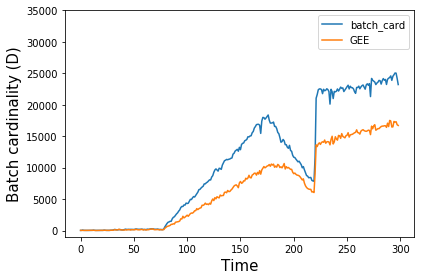

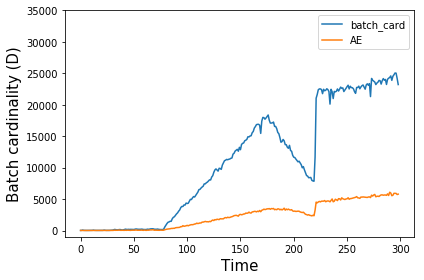

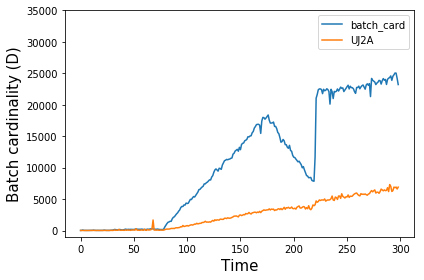

In [19]:
# show the performance of traditional algorithms. 1S
trace = 'caida-ddos'
partition = '1S'
features = ['f_1']
models = [GEE, AE, UJ2A]
model_names = ['GEE', 'AE', 'UJ2A']
sampling_rate = 0.0198
ylim = (-1000, 35000)

plot_sampling(trace, sampling_rate, partition, models, model_names, ylim, xlabel='Time')

,RMSE,MAPE,Cumulative
SGD,9548.194489,82.945000,2.279546e+06
PA,1689.711449,25.425829,3.769378e+05
RLS,1485.193116,21.400885,3.289567e+05


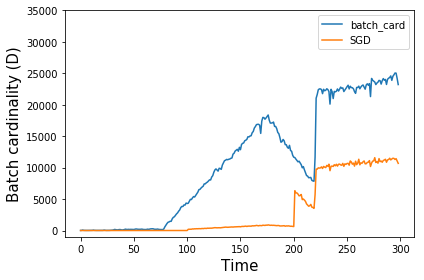

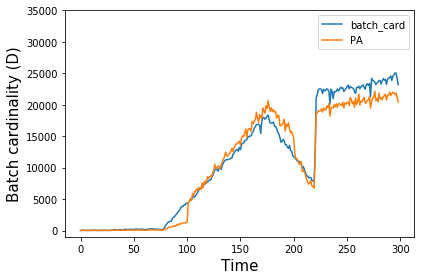

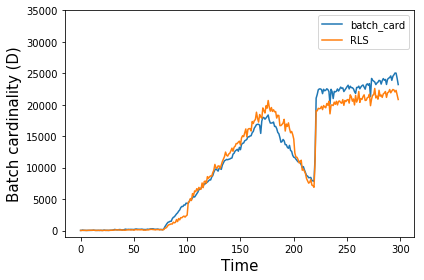

In [20]:
# compare online ML algs.

trace = 'caida-ddos'
sampling_rate = 0.01
training_rate = 0.01
partition = '1S'
features = ['f_1']
ylim = (-1000, 35000)
models = [SGD, PA, RLS]
model_names = ['SGD', 'PA', 'RLS']

plot_ml(trace, sampling_rate, training_rate, partition,
                    features, models, model_names, ylim, xlabel='Time')

,"('f_1',)","('f_1', 'sample_size')","('f_1', 'f_2', 'f_3')","('f_1', 'f_2', 'f_3', 'avg_pkt_len')","('f_1', 'f_2', 'f_3', 'syn_count')"
SGD,82.945000,66.081794,82.524992,69.359607,82.313797
PA,25.425829,22.673704,25.635644,25.140407,25.594010
RLS,21.400885,22.231912,23.124907,27.016271,23.097369


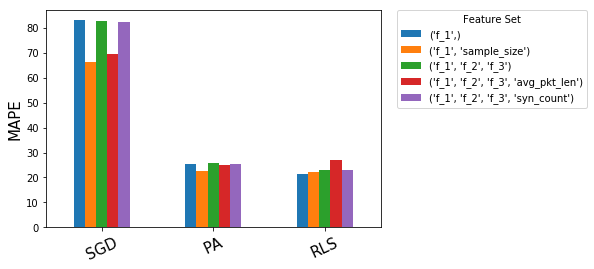

In [21]:
### different feature sets

trace = 'caida-ddos'
sampling_rate = 0.01
training_rate = 0.01
partition = '1S'
feature_sets = [('f_1',), ('f_1', 'sample_size'), ('f_1', 'f_2', 'f_3'), ('f_1', 'f_2', 'f_3', 'avg_pkt_len'),
                ('f_1', 'f_2', 'f_3', 'syn_count')]
models = [SGD, PA, RLS]
model_names = ['SGD', 'PA', 'RLS']

plot_features(trace, sampling_rate, training_rate, partition, feature_sets, models, model_names)

,0.005,0.01,0.015
1S,17.994416,23.875772,40.196706
2S,28.883332,39.985941,60.096500
3S,27.206595,30.460569,33.115894


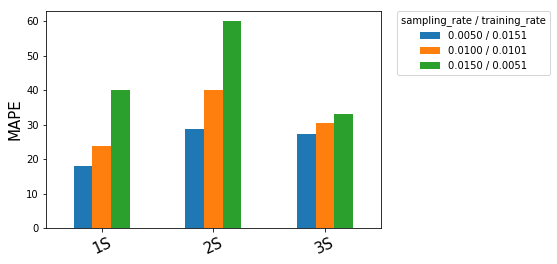

In [22]:
# training rate - sampling rate tradeoff

trace = 'caida-ddos'
effective_sampling_rate = 0.02
sampling_rates = [0.005, 0.01, 0.015]
partitions = ['1S', '2S', '3S']
features = ['f_1','sample_size']
model = PA
model_name='PA'

plot_tradeoff(trace, effective_sampling_rate, sampling_rates, partitions, features, model, model_name)

# DARPA-DDOS

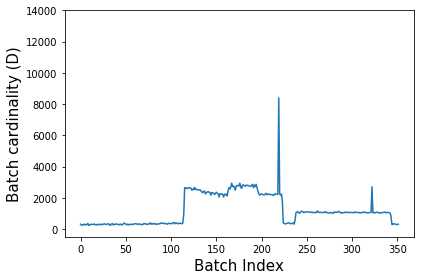

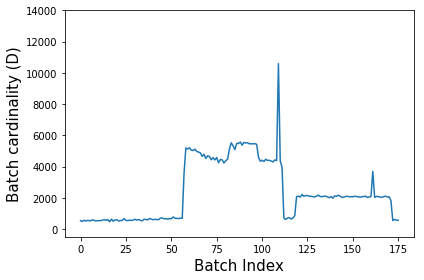

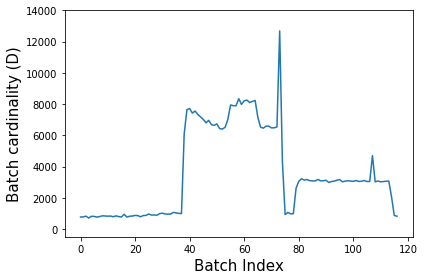

In [23]:
# create cardinality vs batch index graph (Ignore last batch)

trace = 'darpa-ddos'
# choose random sampling rate(has no effect over this graph)
sampling_rate = runs[trace]['sampling_rates'][0]
partitions = runs[trace]['partitions']
ylim = ((-500, 14000))
plot_card(trace, sampling_rate, partitions, ylim)

,RMSE,MAPE,Cumulative
GEE,605.586475,33.046430,157707.691453
AE,873.440949,41.416756,227031.169215
UJ2A,829.440495,31.187520,159092.585740


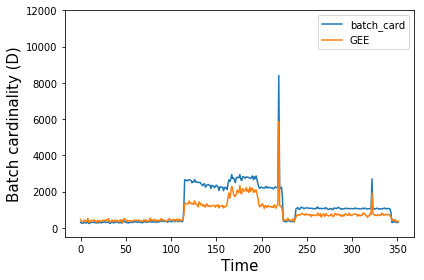

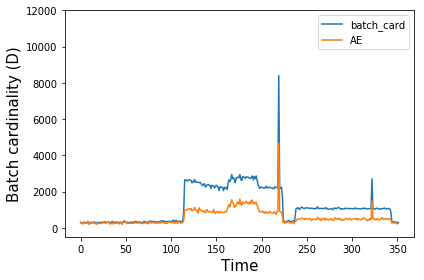

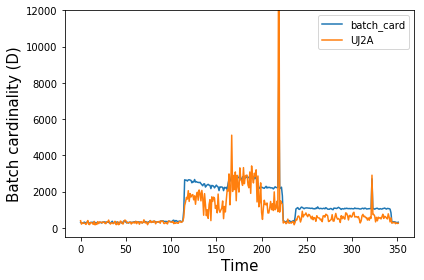

In [26]:
# show the performance of traditional algorithms. 

trace = 'darpa-ddos'
# sampling_rates = runs[trace]['sampling_rates']
partition = '1S'
features = ['f_1']
models = [GEE, AE, UJ2A]
model_names = ['GEE', 'AE', 'UJ2A']
sampling_rate = 0.0975
ylim = ((-500, 12000))

plot_sampling(trace, sampling_rate, partition, models, model_names, ylim, xlabel='Time')

,RMSE,MAPE,Cumulative
SGD,447.350432,23.071808,95441.148047
PA,420.017772,22.068749,77452.670576
RLS,403.952562,22.373427,91249.104083


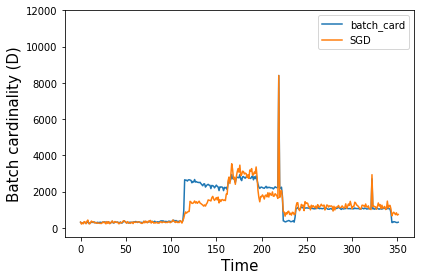

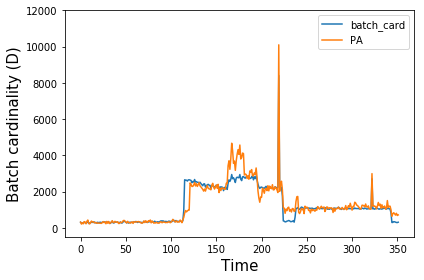

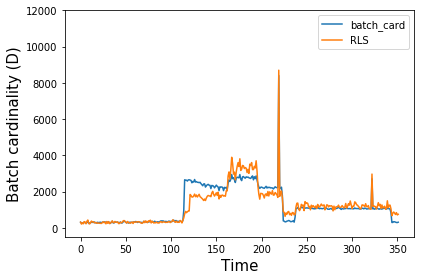

In [27]:
# compare online ML algs.

trace = 'darpa-ddos'
sampling_rate = 0.051
training_rate = 0.05
partition = '1S'
features = ['f_1']
models = [partial(SGD, learning_rate=10**-5), PA, RLS]
model_names = ['SGD', 'PA', 'RLS']
ylim = ((-500, 12000))

plot_ml(trace, sampling_rate, training_rate, partition, features, models, model_names, ylim, xlabel='Time')

,f_1,"('f_1', 'sample_size')","('f_1', 'syn_count')","('f_1', 'f_2', 'f_3')","('f_1', 'f_2', 'f_3', 'avg_pkt_len')","('f_1', 'f_2', 'f_3', 'syn_count')"
PA,22.068749,37.072718,18.406609,22.366671,39.177254,18.666549
RLS,22.373427,45.431731,18.721347,23.354871,48.841801,19.534829


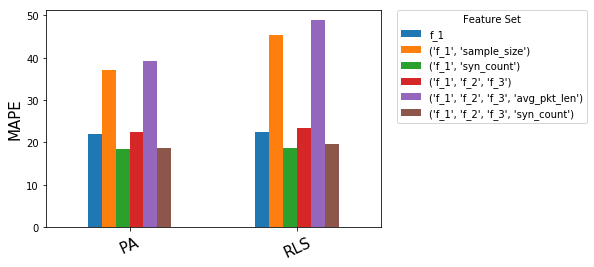

In [28]:
### different feature sets

trace = 'darpa-ddos'
sampling_rate = 0.051
training_rate = 0.05
partition = '1S'

feature_sets = [('f_1'), ('f_1', 'sample_size'), ('f_1', 'syn_count'),
                ('f_1', 'f_2', 'f_3'),
                ('f_1', 'f_2', 'f_3', 'avg_pkt_len'),
                ('f_1', 'f_2', 'f_3', 'syn_count')]

models = [PA, RLS] # partial(SGD, learning_rate=10**-5),
model_names = ['PA', 'RLS'] # 'SGD', 

plot_features(trace, sampling_rate, training_rate, partition, feature_sets, models, model_names)

,0.005,0.01,0.015
1S,19.583625,18.029346,13.813063
2S,16.011403,14.984546,12.764837
3S,15.990079,14.794027,12.357779


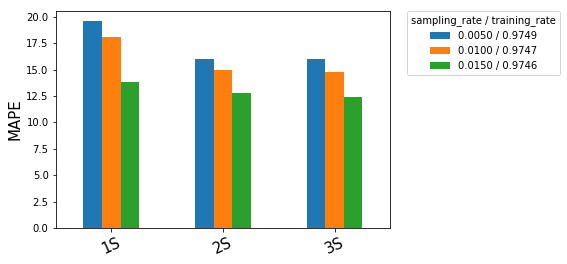

In [29]:
# training rate - sampling rate tradeoff

trace = 'darpa-ddos'
effective_sampling_rate = 0.975
sampling_rates = [0.005, 0.01, 0.015]
partitions = ['1S', '2S', '3S']
features = ['f_1']
model = PA
model_name='PA'

plot_tradeoff(trace, effective_sampling_rate, sampling_rates, partitions, features, model, model_name)

# UCLA-CSD

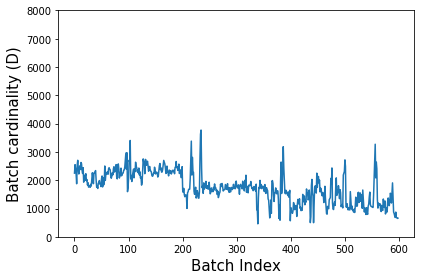

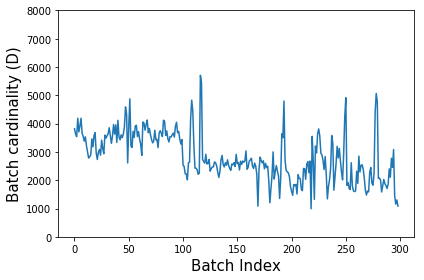

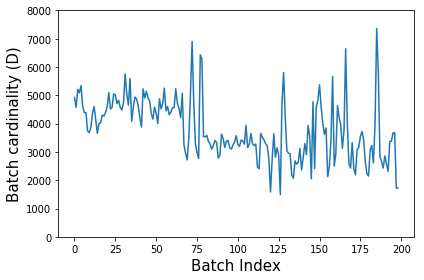

In [30]:
# create cardinality vs batch index graph (Ignore last batch)

trace = 'ucla-csd'
# choose random sampling rate(has no effect over this graph)
sampling_rate = runs[trace]['sampling_rates'][0]
partitions = runs[trace]['partitions']
ylim = (0,8000)

plot_card(trace, sampling_rate, partitions, ylim)

,RMSE,MAPE,Cumulative
GEE,557.167368,12.311408,115362.459305
AE,1977.409825,64.717655,557214.057507
UJ2A,1823.958048,61.940853,518959.789554


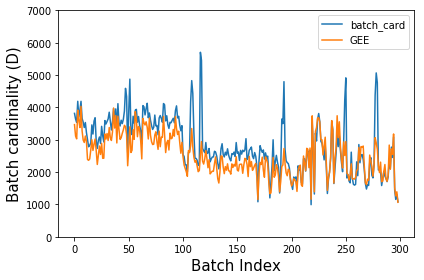

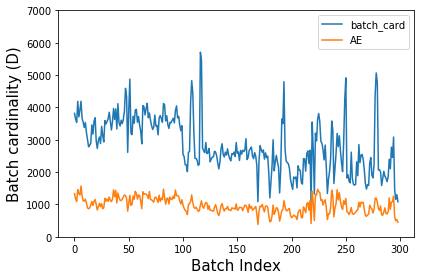

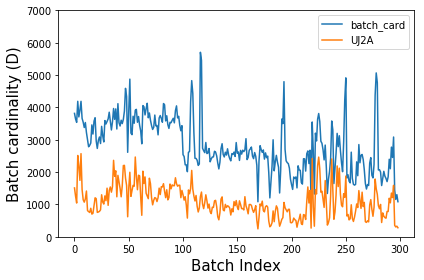

In [33]:
# show the performance of traditional algorithms. 150K, same graph

trace = 'ucla-csd'
# sampling_rates = runs[trace]['sampling_rates']
sampling_rate = 0.0198
partition = '100K'
features = ['f_1']
models = [GEE, AE, UJ2A]
model_names = ['GEE', 'AE', 'UJ2A']
ylim = (0, 7000)

plot_sampling(trace, sampling_rate, partition, models, model_names, ylim)

,RMSE,MAPE,Cumulative
SGD,457.033037,9.693859,82891.505602
PA,474.004726,8.970364,81254.234909
RLS,457.880555,9.805650,83552.575743


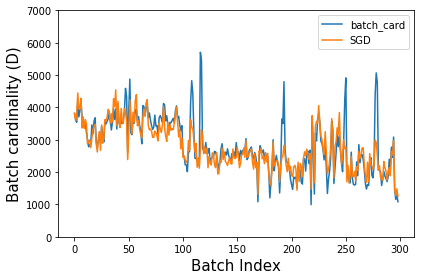

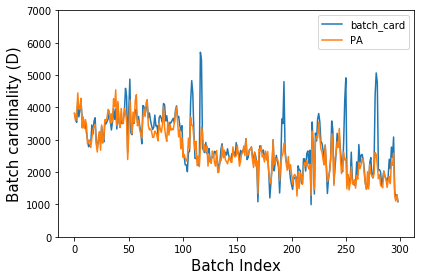

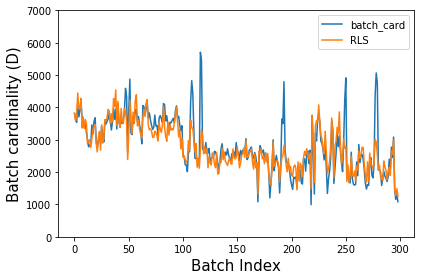

In [34]:
# compare online ML algs.

trace = 'ucla-csd'
sampling_rate = 0.01
training_rate = 0.01
partition = '100K'

features = ['f_1']
models = [partial(SGD, learning_rate=10**-5), PA, RLS]
model_names = ['SGD', 'PA', 'RLS']
ylim = (0, 7000)

plot_ml(trace, sampling_rate, training_rate, partition, features, models, model_names, ylim)

,"('f_1',)","('f_1', 'f_2', 'f_3')","('f_1', 'f_2', 'f_3', 'syn_count')"
SGD,9.693859,8.964832,8.896387
PA,8.970364,8.903106,8.784722
RLS,9.805650,9.105903,9.048428


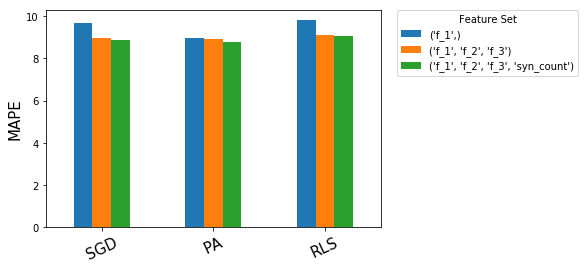

In [35]:
### different feature sets

trace = 'ucla-csd'
sampling_rate = 0.01
training_rate = 0.01
partition = '100K'
feature_sets = [('f_1',), ('f_1', 'f_2', 'f_3'),
                ('f_1', 'f_2', 'f_3', 'syn_count')]
models = [ partial(SGD, learning_rate=10**-5), PA, RLS]
model_names = ['SGD', 'PA', 'RLS']

plot_features(trace, sampling_rate, training_rate, partition, feature_sets, models, model_names)

,0.005,0.01,0.015
50K,20.712554,28.213303,32.436516
100K,21.789147,24.630412,30.042450
150K,27.533529,22.174643,41.103222


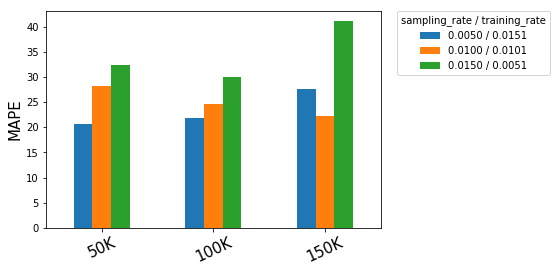

In [36]:
# training rate - sampling rate tradeoff

trace = 'ucla-csd'
effective_sampling_rate = 0.02
sampling_rates = [0.005, 0.01, 0.015]
partitions =  runs[trace]['partitions']
features = ['f_1','sample_size']
model = PA
model_name='PA'

plot_tradeoff(trace, effective_sampling_rate, sampling_rates, partitions, features, model, model_name)